In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv', na_values=['?'])
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [4]:
df[~(df.fillna(value=-1).astype(int) == df.fillna(value=-1))].dropna(how='all').dropna(axis=1, how='all')

,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years)
6,NaN,3.40,NaN,NaN
9,1.266973,2.80,NaN,NaN
16,NaN,NaN,0.25,NaN
22,NaN,NaN,0.25,NaN
28,NaN,0.04,NaN,NaN
...,...,...,...,...
848,NaN,NaN,0.50,NaN
849,NaN,0.16,NaN,NaN
855,NaN,NaN,0.08,NaN
856,NaN,NaN,0.08,NaN


In [5]:
df['Hinselmann'].value_counts()

0    823
1     35
Name: Hinselmann, dtype: int64

In [6]:
df['Schiller'].value_counts()

0    784
1     74
Name: Schiller, dtype: int64

In [7]:
df['Citology'].value_counts()

0    814
1     44
Name: Citology, dtype: int64

In [8]:
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [9]:
def na_percentage(data):
    return data.isna().mean().round(4) * 100

na_percentage(df)

Age                                    0.00
Number of sexual partners              3.03
First sexual intercourse               0.82
Num of pregnancies                     6.53
Smokes                                 1.52
Smokes (years)                         1.52
Smokes (packs/year)                    1.52
Hormonal Contraceptives               12.59
Hormonal Contraceptives (years)       12.59
IUD                                   13.64
IUD (years)                           13.64
STDs                                  12.24
STDs (number)                         12.24
STDs:condylomatosis                   12.24
STDs:cervical condylomatosis          12.24
STDs:vaginal condylomatosis           12.24
STDs:vulvo-perineal condylomatosis    12.24
STDs:syphilis                         12.24
STDs:pelvic inflammatory disease      12.24
STDs:genital herpes                   12.24
STDs:molluscum contagiosum            12.24
STDs:AIDS                             12.24
STDs:HIV                        

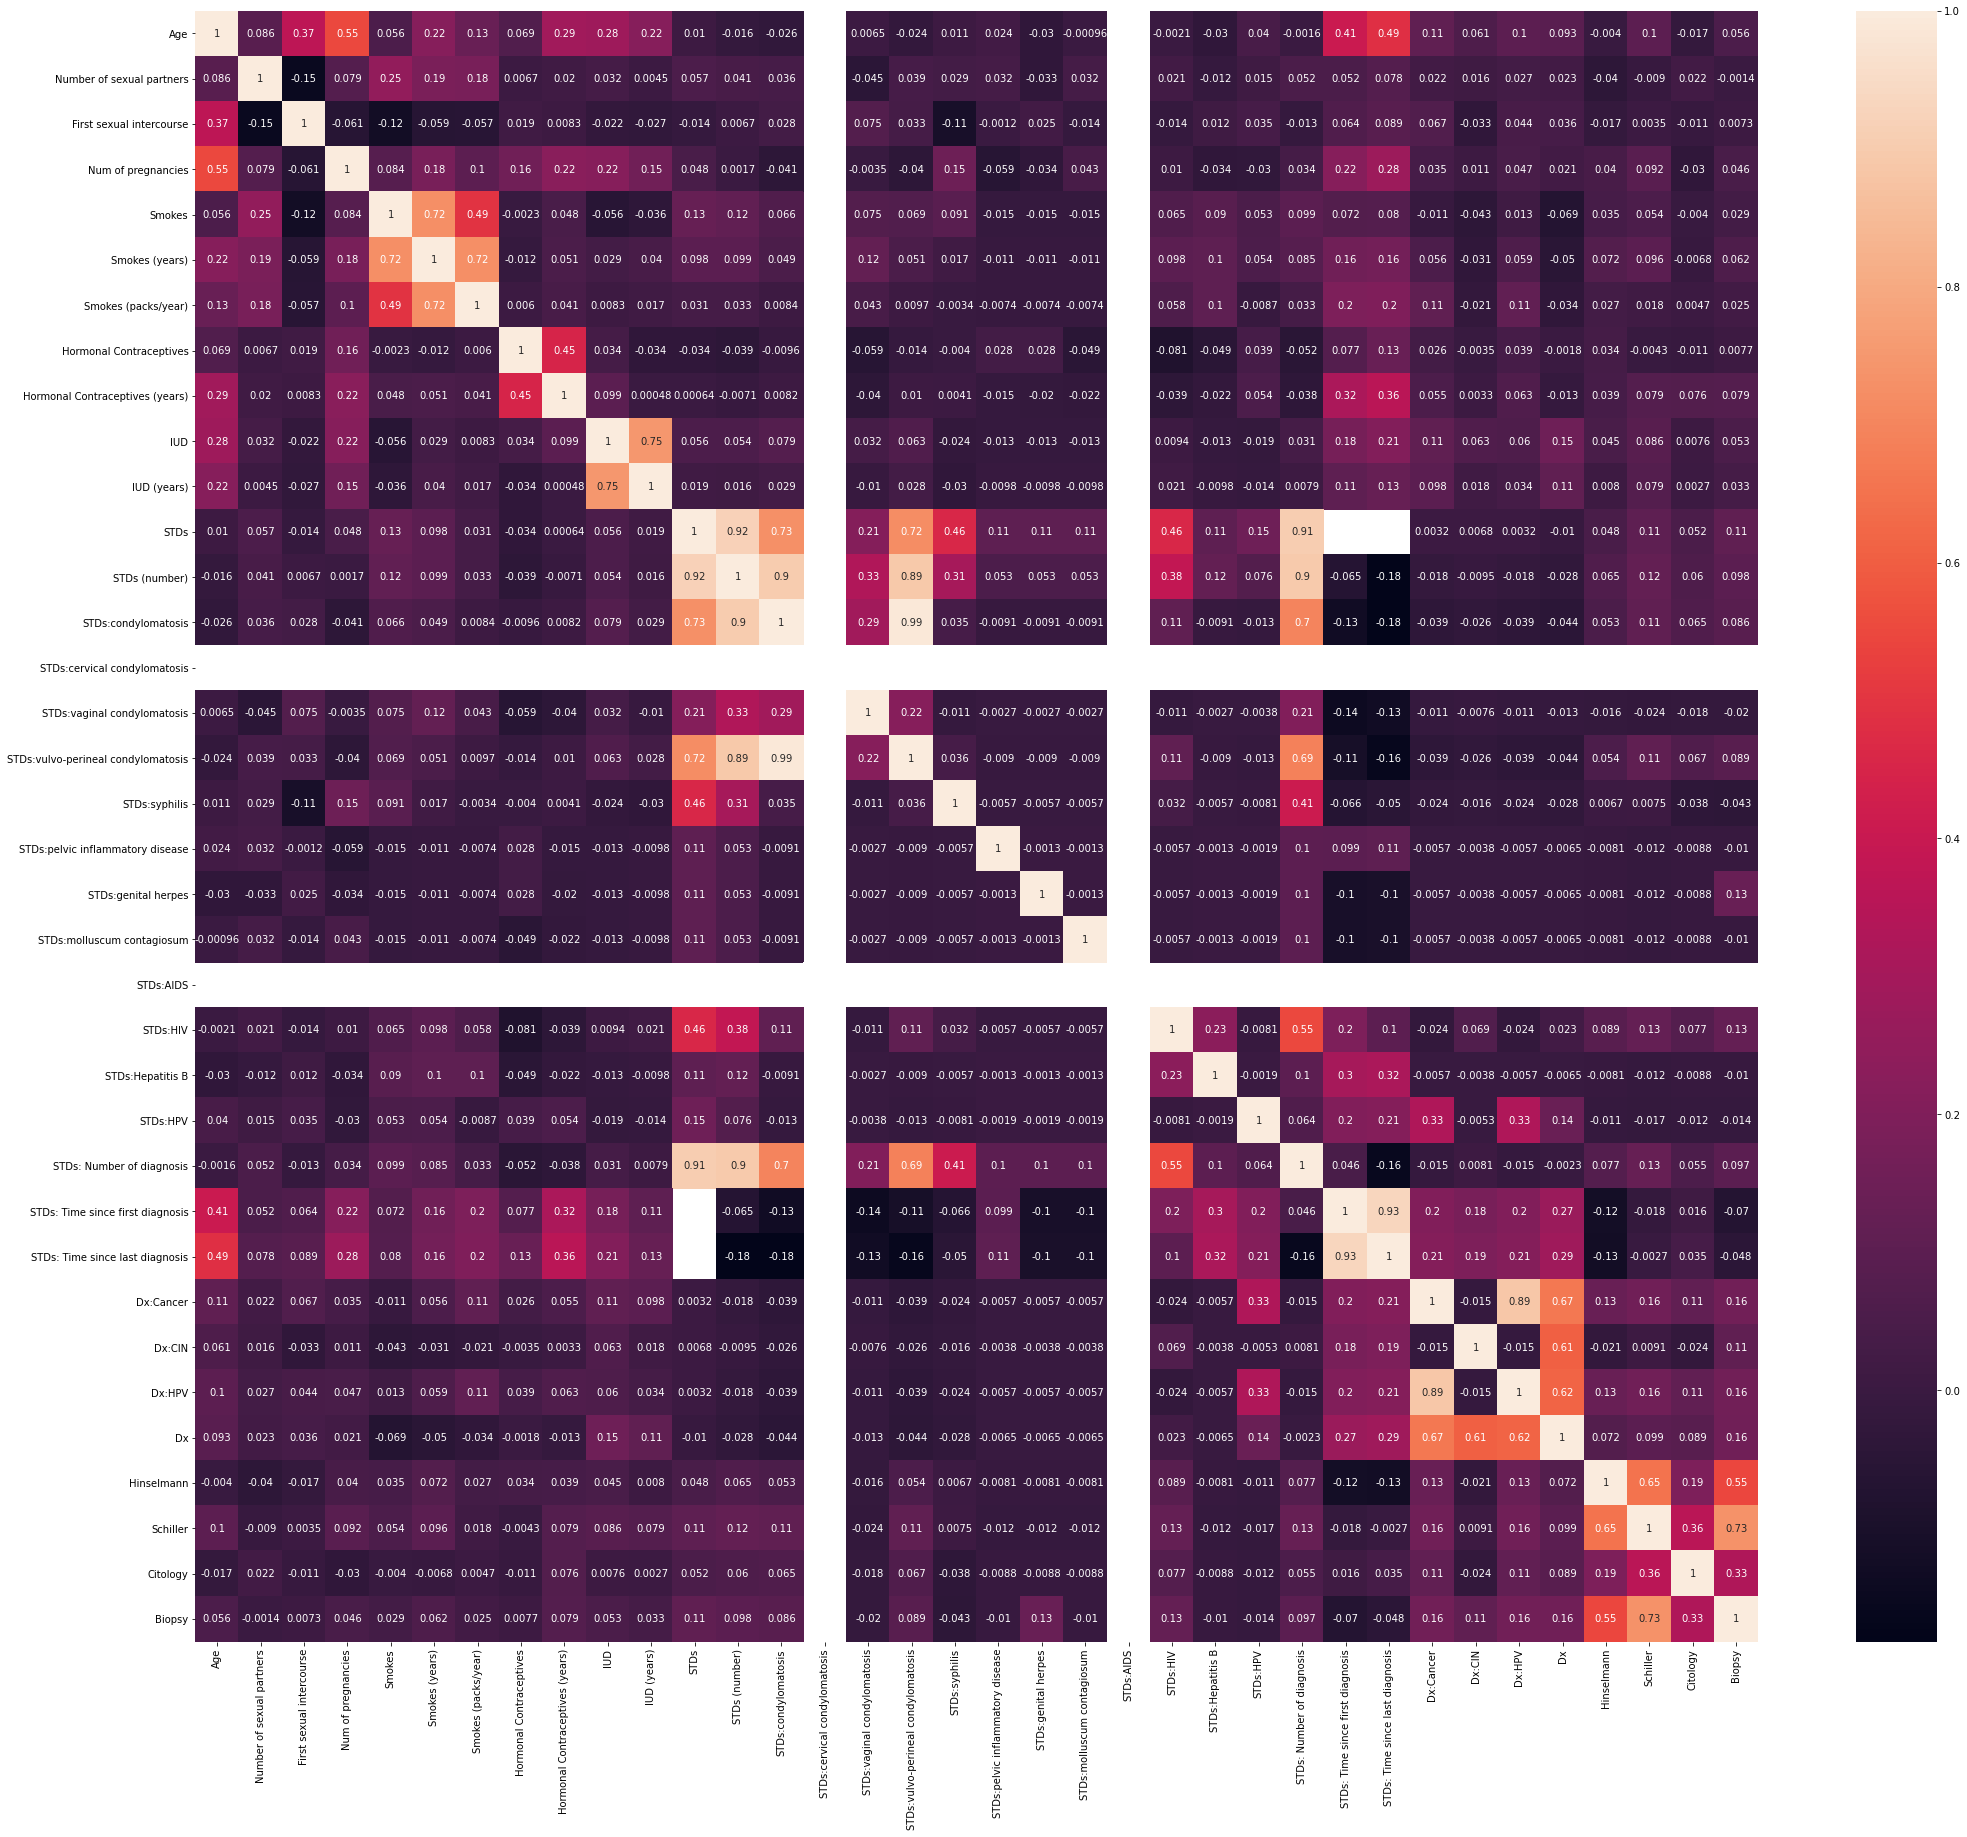

In [10]:
plt.figure(figsize=(35,30), facecolor='white')
sns.heatmap(df.corr(), annot=True)

In [11]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
predicted = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
df.groupby(predicted).count()[['Age']].rename(columns={"Age": "Count"}).unstack(level=[1,2])

Count                  
Schiller               0           1      
Citology               0     1     0     1
Hinselmann Biopsy                         
0          0       756.0  20.0  14.0   3.0
           1         6.0   1.0  12.0  11.0
1          0         1.0   NaN   6.0   3.0
           1         NaN   NaN  19.0   6.0

In [13]:
df.loc[:, (df.nunique() <= 2)]


,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.impute import SimpleImputer, KNNImputer

def fill_missing_values(strategy, data):
    data.fillna(np.nan, inplace=True)
    filled = data
    if strategy in ['mean', 'median', 'most_frequent']:
        imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)    
    elif strategy == 'knn':
        imputer = KNNImputer()
    else: 
        return data
        
    filled = pd.DataFrame(imputer.fit_transform(data), index=data.index, columns=data.columns)

    return filled

df_filled = fill_missing_values('knn', df)

sum(list(na_percentage(df_filled)))

0.0

In [15]:
df_filled.nunique()

Age                                    44
Number of sexual partners              22
First sexual intercourse               25
Num of pregnancies                     24
Smokes                                  3
Smokes (years)                         35
Smokes (packs/year)                    66
Hormonal Contraceptives                 6
Hormonal Contraceptives (years)       118
IUD                                     5
IUD (years)                            45
STDs                                    4
STDs (number)                           8
STDs:condylomatosis                     4
STDs:cervical condylomatosis            1
STDs:vaginal condylomatosis             2
STDs:vulvo-perineal condylomatosis      4
STDs:syphilis                           4
STDs:pelvic inflammatory disease        2
STDs:genital herpes                     2
STDs:molluscum contagiosum              3
STDs:AIDS                               1
STDs:HIV                                3
STDs:Hepatitis B                  

In [16]:
df_filled['STDs (number)'].unique()


array([0. , 2. , 1. , 0.2, 0.8, 3. , 0.4, 4. ])

In [17]:
df_filled.loc[:, (df.nunique() <= 2)] = df_filled.loc[:, (df.nunique() <= 2)].apply(round)
df_filled.nunique()

Age                                    44
Number of sexual partners              22
First sexual intercourse               25
Num of pregnancies                     24
Smokes                                  2
Smokes (years)                         35
Smokes (packs/year)                    66
Hormonal Contraceptives                 2
Hormonal Contraceptives (years)       118
IUD                                     2
IUD (years)                            45
STDs                                    2
STDs (number)                           8
STDs:condylomatosis                     2
STDs:cervical condylomatosis            1
STDs:vaginal condylomatosis             2
STDs:vulvo-perineal condylomatosis      2
STDs:syphilis                           2
STDs:pelvic inflammatory disease        2
STDs:genital herpes                     2
STDs:molluscum contagiosum              2
STDs:AIDS                               1
STDs:HIV                                2
STDs:Hepatitis B                  

In [18]:
# noinspection PyPep8Naming
def create_x_y(data):
    data_X = data.drop(predicted, axis='columns')

    data_y = data[predicted].copy()

    data_y["label"] = data.apply(lambda row: f"{int(row['Hinselmann'])}{int(row['Schiller'])}{int(row['Citology'])}{int(row['Biopsy'])}", axis=1)
    print(data_y["label"].unique())
    return data_X, data_y

# Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix

X, y = create_x_y(df_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y['label'])

['0000' '1101' '0111' '0100' '0101' '1100' '1110' '1111' '0010' '0001'
 '0110' '1000' '0011']


In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(model, X, y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=15))
scores.append(scores.mean().rename('Mean'))

c:\programs\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.006997,0.004003,0.637931,0.090686,0.087470
1,0.009000,0.003001,0.706897,0.100490,0.084536
2,0.007994,0.005002,0.862069,0.140056,0.116822
3,0.011997,0.002002,0.824561,0.153595,0.150641
4,0.007998,0.003000,0.824561,0.316993,0.261438
5,0.007002,0.002999,0.824561,0.316993,0.271709
6,0.006999,0.002002,0.807018,0.153333,0.150327
7,0.008034,0.001966,0.771930,0.125714,0.110000
8,0.008034,0.002966,0.736842,0.120000,0.107143
9,0.006972,0.004015,0.789474,0.128571,0.090000


In [21]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[171,   0,   1,   0,   1,   2,   0,   3,   0,   3,   0,   2],
       [  1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   1,   0,   0,   1,   0,   0,   0,   1,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [22]:
pd.Series(y_pred).value_counts()

0000    193
0111      5
0101      5
1101      5
1111      3
0010      2
0110      1
0100      1
dtype: int64

# Decision tree - features reduced

In [48]:
def remove_correlating(data, corr_threshold=0.7):
    corr = data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= corr_threshold:
                if columns[j]:
                    columns[j] = False

    # columns[-1] = False
    selected_columns = data.columns[columns]
    print(f"Removing {len(data.columns[~columns])} attributes: {data.columns[~columns]}")
    return data[selected_columns], selected_columns

In [28]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
transformed_x = selector.fit_transform(X_train, y_train)
model.fit(transformed_x, y_train)
scores = pd.DataFrame(cross_validate(model, selector.transform(X), y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=15))
scores.append(scores.mean().rename('Mean'))

c:\programs\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.010997,0.004002,0.637931,0.090686,0.099462
1,0.007996,0.005004,0.741379,0.105392,0.097506
2,0.007996,0.004005,0.810345,0.131653,0.112981
3,0.014997,0.002999,0.807018,0.150327,0.127601
4,0.010000,0.003000,0.859649,0.323529,0.274725
5,0.006998,0.002000,0.842105,0.320261,0.274510
6,0.006000,0.003005,0.807018,0.153333,0.150327
7,0.011992,0.005021,0.789474,0.128571,0.111386
8,0.018000,0.005999,0.754386,0.122857,0.108586
9,0.011997,0.003998,0.789474,0.128571,0.081818


In [25]:
X.loc[:, ~selector.get_support()]

,STDs:cervical condylomatosis,STDs:AIDS,STDs:Hepatitis B
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
853,0.0,0.0,0.0
854,0.0,0.0,0.0
855,0.0,0.0,0.0
856,0.0,0.0,0.0


Removing 11 attributes: Index(['Smokes (years)', 'Smokes (packs/year)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:HPV', 'Dx'],
      dtype='object')


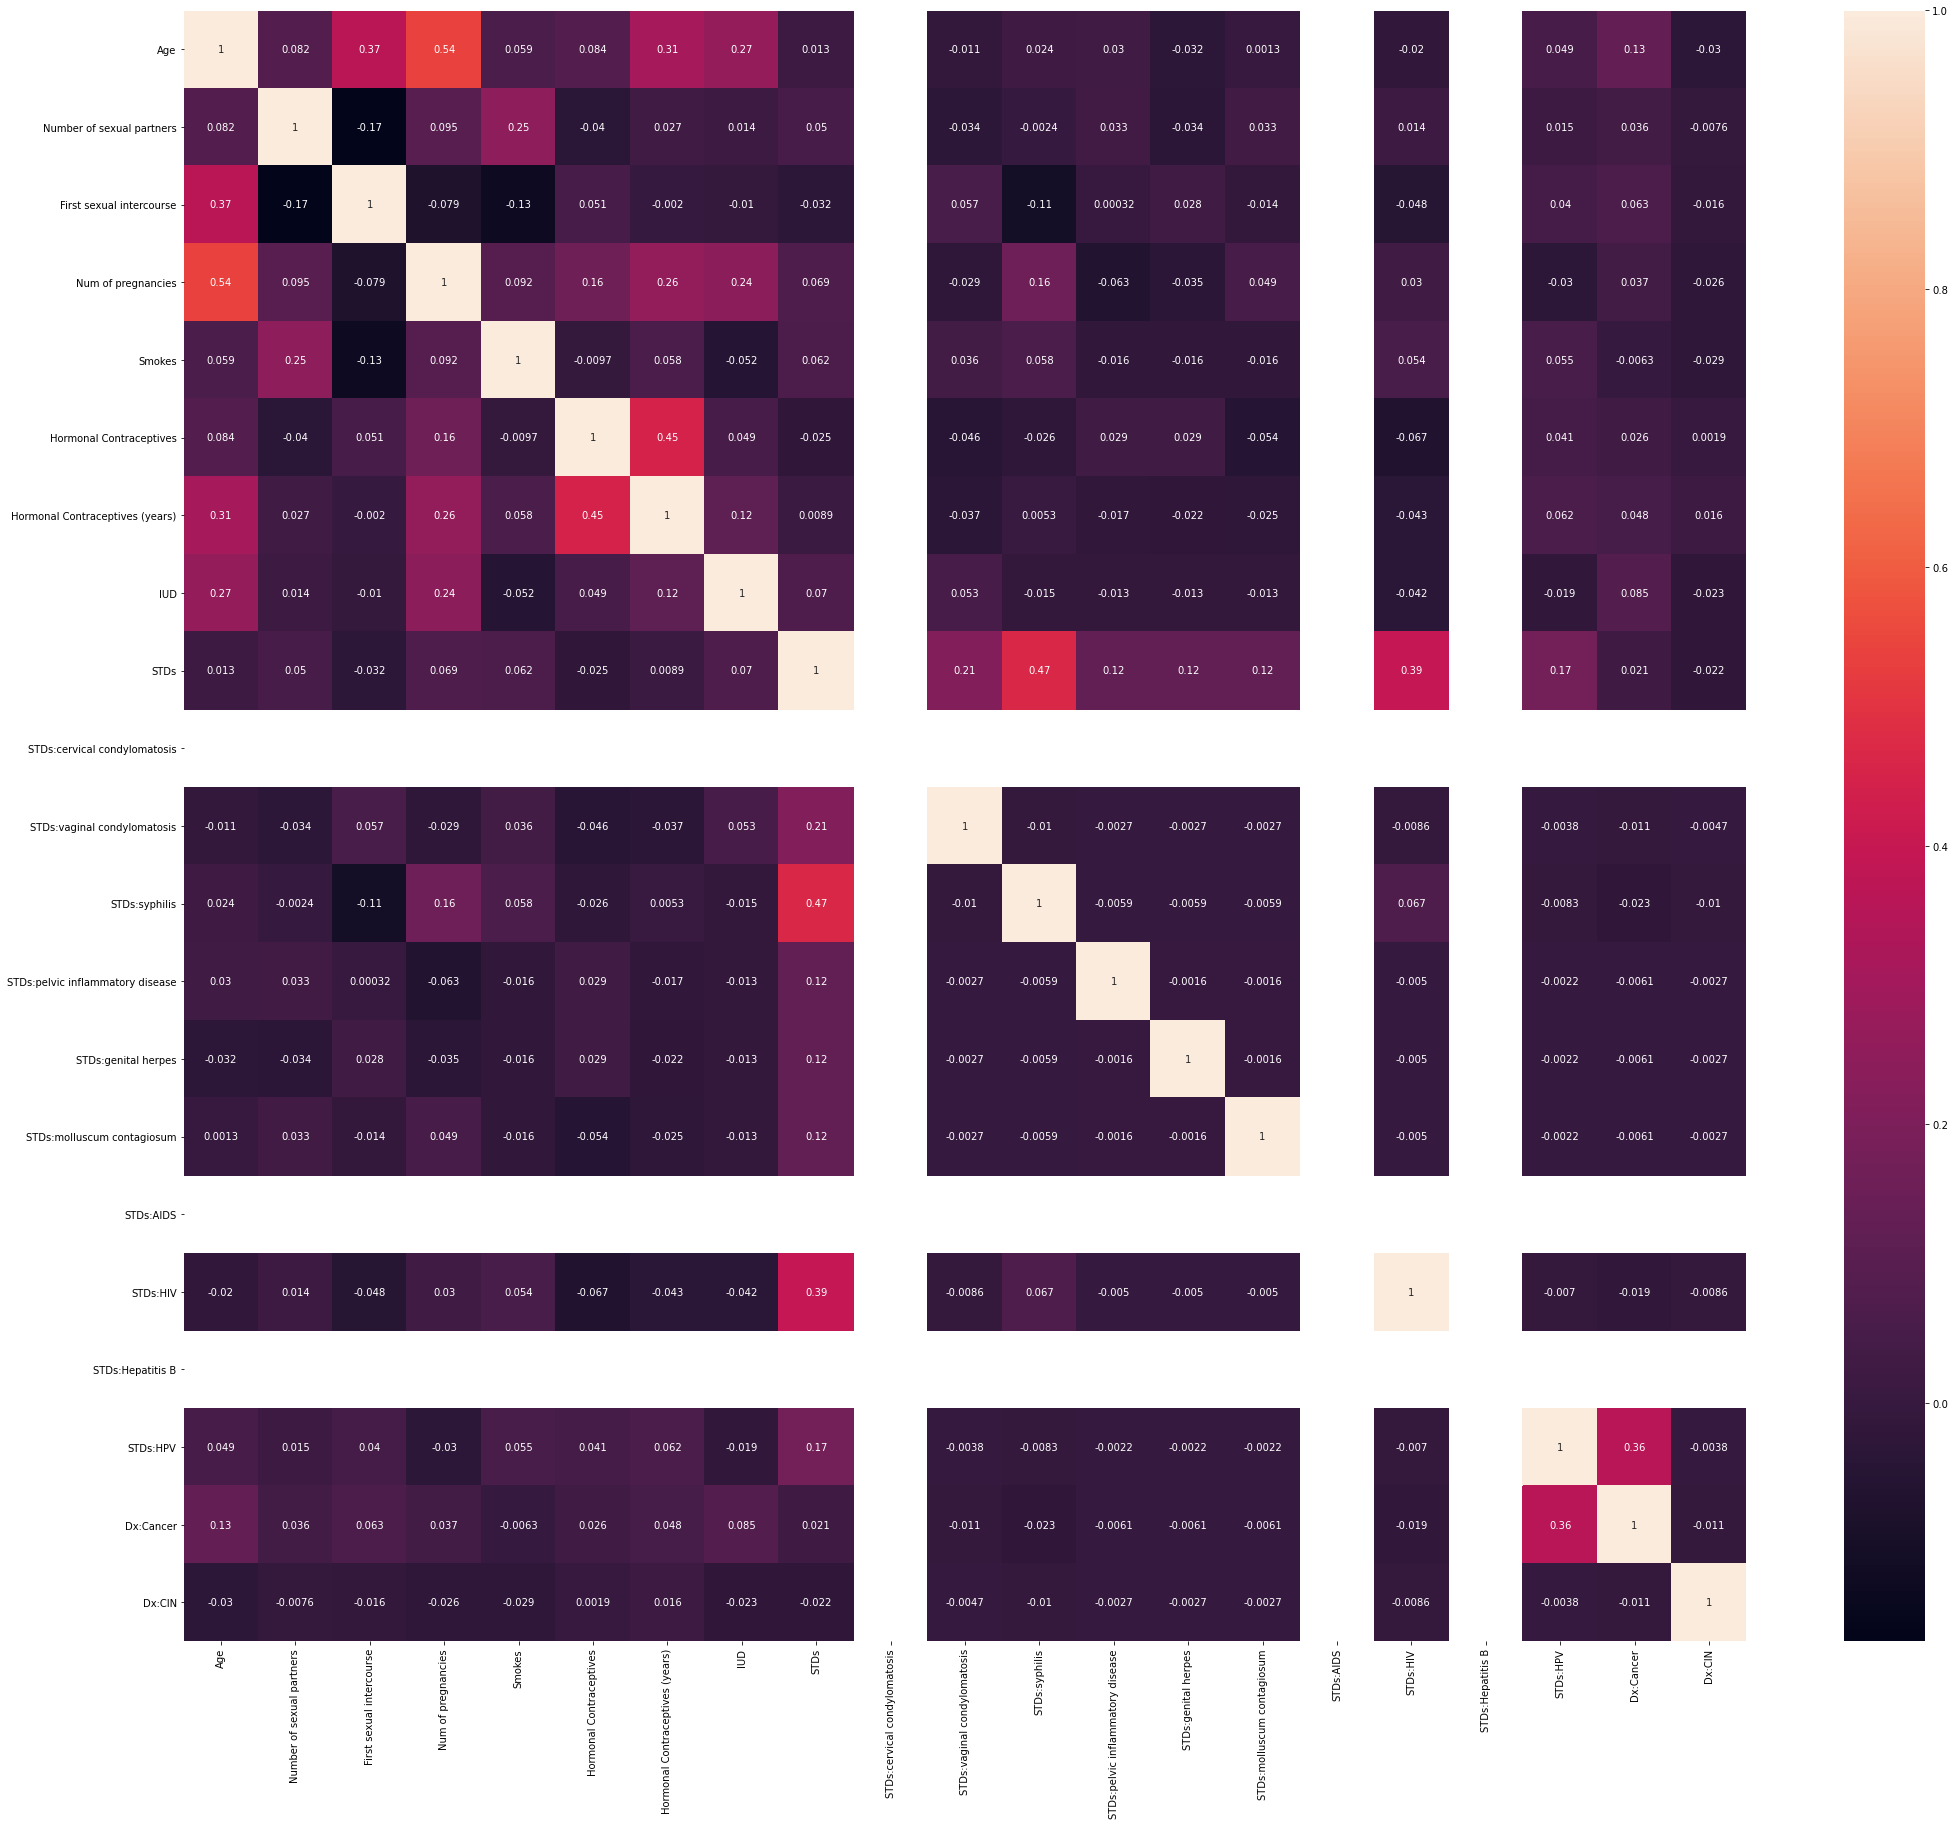

In [59]:
transformed_x, selected_cols = remove_correlating(X_train, corr_threshold=0.6)
plt.figure(figsize=(35,30), facecolor='white')
sns.heatmap(transformed_x.corr(), annot=True)

In [69]:
model.fit(transformed_x, y_train)
scores = pd.DataFrame(cross_validate(model, X[selected_cols], y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=15))
scores.append(scores.mean().rename('Mean'))

c:\programs\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.007997,0.002999,0.586207,0.083333,0.092391
1,0.007004,0.002997,0.775862,0.110294,0.098039
2,0.005999,0.003002,0.793103,0.128852,0.100218
3,0.006001,0.002999,0.807018,0.150327,0.127601
4,0.005000,0.003999,0.842105,0.320261,0.225613
5,0.008999,0.004002,0.842105,0.400327,0.281667
6,0.006004,0.002000,0.789474,0.230000,0.257778
7,0.004998,0.002000,0.754386,0.122857,0.107500
8,0.005004,0.010005,0.754386,0.122857,0.096521
9,0.011994,0.005002,0.736842,0.120000,0.106061


In [75]:
model.fit(selector.fit_transform(transformed_x), y_train)
scores = pd.DataFrame(cross_validate(model, selector.transform(X[selected_cols]), y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=15))
scores.append(scores.mean().rename('Mean'))

c:\programs\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\programs\

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.005000,0.004001,0.603448,0.085784,0.094086
1,0.004997,0.003003,0.758621,0.107843,0.096810
2,0.004997,0.002000,0.706897,0.114846,0.106771
3,0.007005,0.004011,0.789474,0.147059,0.126050
4,0.009991,0.003001,0.859649,0.323529,0.198718
5,0.003999,0.003002,0.842105,0.400327,0.269921
6,0.003998,0.003527,0.771930,0.146667,0.145215
7,0.003998,0.002001,0.736842,0.120000,0.106061
8,0.003001,0.002002,0.771930,0.125714,0.110000
9,0.003995,0.003038,0.736842,0.120000,0.107143


# Random forest